Importing most important python libraries:

In [276]:
import pandas as pd
import numpy as np

There are 8 different csv files regarding each year. 
<br>To make full analysis throughout 2015-2022, I am going to join each file into main dataframe using 'for in' loop. 
<br>Python codes slash marks differently so that had to be adjusted to '/' instead of '\\', along with typing raw string instead of regular one.
<br>*note: be careful of 2022 year file. Some columns have "," thousand delimiter so it can be easily mistaken by comma (fraction delimiter). I took take of this directly in csv file.

In [277]:
files = ['2015', '2016', '2017', '2018', '2019', '2020', '2021']
          
main_df = pd.DataFrame(pd.read_csv(r"C:/Users/Agata/Documents/GitHub/Happiness-Report/source_files/2015.csv"))
main_df['year'] = '2015'
for i in range(1, len(files)):
    data = pd.read_csv(r"C:/Users/Agata/Documents/GitHub/Happiness-Report/source_files/"+files[i]+r".csv")
    df = pd.DataFrame(data)
    df['year'] = files[i]
    main_df = pd.concat([main_df,df],axis=0)
    main_df = main_df.reset_index(drop=True)
main_df.head()


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Generosity_,Perceptions of corruption_,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [278]:
main_df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'year', 'Lower Confidence Interval',
       'Upper Confidence Interval', 'Happiness.Rank', 'Happiness.Score',
       'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.',
       'Health..Life.Expectancy.', 'Trust..Government.Corruption.',
       'Dystopia.Residual', 'Overall rank', 'Country or region', 'Score',
       'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Perceptions of corruption',
       'Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support_', 'Healthy life expectancy_',
       'Freedom to make life choices_', 'Generosity_',
       'Perceptions of corr

Let's see what the dataframe looks like:

In [279]:
main_df.info()
main_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084 entries, 0 to 1083
Data columns (total 51 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     470 non-null    object 
 1   Region                                      315 non-null    object 
 2   Happiness Rank                              315 non-null    float64
 3   Happiness Score                             315 non-null    float64
 4   Standard Error                              158 non-null    float64
 5   Economy (GDP per Capita)                    315 non-null    float64
 6   Family                                      470 non-null    float64
 7   Health (Life Expectancy)                    315 non-null    float64
 8   Freedom                                     470 non-null    float64
 9   Trust (Government Corruption)               315 non-null    float64
 10  Generosity  

(1084, 51)

The df has 1231 rows and 56 columns. Let's see how many columns are unique:

In [280]:
len(main_df.columns.unique())

51

All columns are unique. However, the number of columns is high so we will focus on null values next:

In [281]:
main_df.isnull().sum(axis=0)

Country                                       614
Region                                        769
Happiness Rank                                769
Happiness Score                               769
Standard Error                                926
Economy (GDP per Capita)                      769
Family                                        614
Health (Life Expectancy)                      769
Freedom                                       614
Trust (Government Corruption)                 769
Generosity                                    302
Dystopia Residual                             769
year                                            0
Lower Confidence Interval                     927
Upper Confidence Interval                     927
Happiness.Rank                                929
Happiness.Score                               929
Whisker.high                                  929
Whisker.low                                   929
Economy..GDP.per.Capita.                      929


We can see that there are more null values in almost each column than non-null values. That means the columns in each file could be named differently. 

In [282]:
main_df.columns.sort_values()


Index(['Country', 'Country name', 'Country or region', 'Dystopia + residual',
       'Dystopia Residual', 'Dystopia.Residual', 'Economy (GDP per Capita)',
       'Economy..GDP.per.Capita.',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Healthy life expectancy',
       'Explained by: Log GDP per capita',
       'Explained by: Perceptions of corruption',
       'Explained by: Social support', 'Family', 'Freedom',
       'Freedom to make life choices', 'Freedom to make life choices_',
       'GDP per capita', 'Generosity', 'Generosity_', 'Happiness Rank',
       'Happiness Score', 'Happiness.Rank', 'Happiness.Score',
       'Health (Life Expectancy)', 'Health..Life.Expectancy.',
       'Healthy life expectancy', 'Healthy life expectancy_', 'Ladder score',
       'Ladder score in Dystopia', 'Logged GDP per capita',
       'Lower Confidence Interval', 'Overall rank',
       'Perceptions of corruption', 'Perceptions of corruption_', 'R

There is significant redundancy in the columns.
<br>For example, information about countries is split into three columns:
* Country
* Country or region
* Country name
<br> The files have between 9-20 columns. We could equalize the names manually (directly in csv files) which would take long time or create a dictionary with desired names and swap them as below:

In [283]:
correct_names = {'Economy (GDP per Capita)' : 'GDP per Capita',
'Family' : 'Social Support',
'Generosity_' : "Generosity",
'Health (Life Expectancy)' : 'Healthy Life Expectancy',
'Freedom' : 'Freedom to Make Life Choices',
'Trust (Government Corruption)' : 'Corruption Perception',
'Happiness.Rank' : 'Happiness Rank',
'Happiness.Score' : 'Happiness Score',
'Economy..GDP.per.Capita.' : 'GDP per Capita',
'Health..Life.Expectancy.' : 'Healthy Life Expectancy',
'Trust..Government.Corruption.' : 'Corruption Perception',
'Dystopia.Residual' : 'Dystopia Residual',
'Overall rank' : 'Happiness Rank',
'Country or region' : 'Country',
'Score' : 'Happiness Score',
'GDP per capita' : 'GDP per Capita',
'Country name' : 'Country',
'Regional indicator' : 'Region',
'RANK' : 'Happiness Rank',
'Happiness score' : 'Happiness Score',
'Dystopia (1.83) + residual' : 'Dystopia Residual',
'Ladder score' : 'Happiness Score',
'Dystopia + residual' : 'Dystopia Residual',
'Social support' : 'Social Support',
'Social support_' : 'Social Support',
'Healthy life expectancy' : 'Healthy Life Expectancy',
'Healthy life expectancy_' : 'Healthy Life Expectancy',
'Freedom to make life choices' : 'Freedom to Make Life Choices',
'Freedom to make life choices_' : 'Freedom to Make Life Choices',
'Perceptions of corruption' : 'Corruption Perception',
'Perceptions of corruption_' : 'Corruption Perception',
'Logged GDP per capita' : 'GDP per Capita'
}

In [284]:
main_df = main_df.rename(columns=correct_names)
main_df.columns.sort_values()
main_df.tail()


,Country,Region,Happiness Rank,Happiness Score,Standard Error,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Corruption Perception,...,Generosity,Corruption Perception,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia Residual
1079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
1080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
1081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
1082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205
1083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.102,0.924,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895


In [285]:
files = ['2015', '2016', '2017', '2018', '2019', '2020','2021']
          
main_df = pd.DataFrame(pd.read_csv(r"C:/Users/Agata/Documents/GitHub/Happiness-Report/source_files/2015.csv"))
main_df = main_df.rename(columns=correct_names)
main_df['Year'] = '2015'

for i in range(1, len(files)):
    data = pd.read_csv(r"C:/Users/Agata/Documents/GitHub/Happiness-Report/source_files/"+files[i]+r".csv")
    df = pd.DataFrame(data)
    df = df.rename(columns=correct_names)
    df['Year'] = files[i]
    main_df = pd.concat([main_df,df],axis=0)
    main_df = main_df.reset_index(drop=True)
    df.to_csv(r"C:/Users/Agata/Documents/"+files[i]+r".csv", index=True)
main_df.tail()

#df = pd.DataFrame(pd.read_csv(r"C:/Users/Agata/Documents/GitHub/Happiness-Report/source_files/2016.csv"))
#df = df.rename(columns=correct_names)
#df['Year'] = '2016'
#main_df = pd.concat([main_df,df],axis=0)
#main_df = main_df.reset_index(drop=True)
#main_df =  main_df.set_index(['Year','Country'])
#main_df.to_csv(r"C:/Users/Agata/Documents/"+files[i]+r".csv", index=True)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Corruption Perception,...,Standard error of ladder score,upperwhisker,lowerwhisker,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
1079,Lesotho,Sub-Saharan Africa,NaN,3.512,NaN,7.926,0.787,48.700,0.715,0.915,...,0.120,3.748,3.276,2.43,0.451,0.731,0.007,0.405,0.103,0.015
1080,Botswana,Sub-Saharan Africa,NaN,3.467,NaN,9.782,0.784,59.269,0.824,0.801,...,0.074,3.611,3.322,2.43,1.099,0.724,0.340,0.539,0.027,0.088
1081,Rwanda,Sub-Saharan Africa,NaN,3.415,NaN,7.676,0.552,61.400,0.897,0.167,...,0.068,3.548,3.282,2.43,0.364,0.202,0.407,0.627,0.227,0.493
1082,Zimbabwe,Sub-Saharan Africa,NaN,3.145,NaN,7.943,0.750,56.201,0.677,0.821,...,0.058,3.259,3.030,2.43,0.457,0.649,0.243,0.359,0.157,0.075
1083,Afghanistan,South Asia,NaN,2.523,NaN,7.695,0.463,52.493,0.382,0.924,...,0.038,2.596,2.449,2.43,0.370,0.000,0.126,0.000,0.122,0.010


In [286]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084 entries, 0 to 1083
Data columns (total 27 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     1084 non-null   object 
 1   Region                                      617 non-null    object 
 2   Happiness Rank                              782 non-null    float64
 3   Happiness Score                             1084 non-null   float64
 4   Standard Error                              158 non-null    float64
 5   GDP per Capita                              1084 non-null   float64
 6   Social Support                              1084 non-null   float64
 7   Healthy Life Expectancy                     1084 non-null   float64
 8   Freedom to Make Life Choices                1084 non-null   float64
 9   Corruption Perception                       1083 non-null   float64
 10  Generosity  

In [287]:
df = main_df.loc[:,:'Year']
df = df.drop(columns='Standard Error')
df['Country'] = df['Country'].str.replace('*','')
df[df.Year.isin(['2020','2021'])]

C:\Users\Agata\AppData\Local\Temp\ipykernel_7980\1644121685.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Country'] = df['Country'].str.replace('*','')


,Country,Region,Happiness Rank,Happiness Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Corruption Perception,Generosity,Dystopia Residual,Year
782,Finland,Western Europe,NaN,7.8087,10.639267,0.954330,71.900825,0.949172,0.195445,-0.059482,2.762835,2020
783,Denmark,Western Europe,NaN,7.6456,10.774001,0.955991,72.402504,0.951444,0.168489,0.066202,2.432741,2020
784,Switzerland,Western Europe,NaN,7.5599,10.979933,0.942847,74.102448,0.921337,0.303728,0.105911,2.350267,2020
785,Iceland,Western Europe,NaN,7.5045,10.772559,0.974670,73.000000,0.948892,0.711710,0.246944,2.460688,2020
786,Norway,Western Europe,NaN,7.4880,11.087804,0.952487,73.200783,0.955750,0.263218,0.134533,2.168266,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
1079,Lesotho,Sub-Saharan Africa,NaN,3.5120,7.926000,0.787000,48.700000,0.715000,0.915000,-0.131000,1.800000,2021
1080,Botswana,Sub-Saharan Africa,NaN,3.4670,9.782000,0.784000,59.269000,0.824000,0.801000,-0.246000,0.648000,2021
1081,Rwanda,Sub-Saharan Africa,NaN,3.4150,7.676000,0.552000,61.400000,0.897000,0.167000,0.061000,1.095000,2021
1082,Zimbabwe,Sub-Saharan Africa,NaN,3.1450,7.943000,0.750000,56.201000,0.677000,0.821000,-0.047000,1.205000,2021


In [288]:
rank = df[df.Year.isin(['2020','2021'])]
rank['Happiness Rank'] = rank.groupby('Year')['Happiness Score'].rank('dense',ascending=False)
#rank.to_csv(r'C:/Users/Agata/Desktop/test_rank.csv', index=True)
df.loc[782:1083,'Happiness Rank'] = rank['Happiness Rank']

C:\Users\Agata\AppData\Local\Temp\ipykernel_7980\4052411680.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rank['Happiness Rank'] = rank.groupby('Year')['Happiness Score'].rank('dense',ascending=False)


In [289]:
df[df.Year.isin(['2016'])]

,Country,Region,Happiness Rank,Happiness Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Corruption Perception,Generosity,Dystopia Residual,Year
158,Denmark,Western Europe,1.0,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
159,Switzerland,Western Europe,2.0,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
160,Iceland,Western Europe,3.0,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
161,Norway,Western Europe,4.0,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
162,Finland,Western Europe,5.0,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
310,Benin,Sub-Saharan Africa,153.0,3.484,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,2016
311,Afghanistan,Southern Asia,154.0,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,2016
312,Togo,Sub-Saharan Africa,155.0,3.303,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,2016
313,Syria,Middle East and Northern Africa,156.0,3.069,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,2016


In [290]:
c = df.loc[158:314].Country.tolist()
r = df.loc[158:314].Region.tolist()
region = {c[i] : r[i] for i in range(len(c))}
region
df['Region'] = df.Country.map(region)
df


,Country,Region,Happiness Rank,Happiness Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Corruption Perception,Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
1079,Lesotho,NaN,143.0,3.512,7.92600,0.78700,48.70000,0.71500,0.91500,-0.13100,1.80000,2021
1080,Botswana,Sub-Saharan Africa,144.0,3.467,9.78200,0.78400,59.26900,0.82400,0.80100,-0.24600,0.64800,2021
1081,Rwanda,Sub-Saharan Africa,145.0,3.415,7.67600,0.55200,61.40000,0.89700,0.16700,0.06100,1.09500,2021
1082,Zimbabwe,Sub-Saharan Africa,146.0,3.145,7.94300,0.75000,56.20100,0.67700,0.82100,-0.04700,1.20500,2021


In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084 entries, 0 to 1083
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       1084 non-null   object 
 1   Region                        1043 non-null   object 
 2   Happiness Rank                1084 non-null   float64
 3   Happiness Score               1084 non-null   float64
 4   GDP per Capita                1084 non-null   float64
 5   Social Support                1084 non-null   float64
 6   Healthy Life Expectancy       1084 non-null   float64
 7   Freedom to Make Life Choices  1084 non-null   float64
 8   Corruption Perception         1083 non-null   float64
 9   Generosity                    1084 non-null   float64
 10  Dystopia Residual             772 non-null    float64
 11  Year                          1084 non-null   object 
dtypes: float64(9), object(3)
memory usage: 101.8+ KB


In [292]:
#df.to_csv(r'C:/Users/Agata/Desktop/test.csv', index=True)

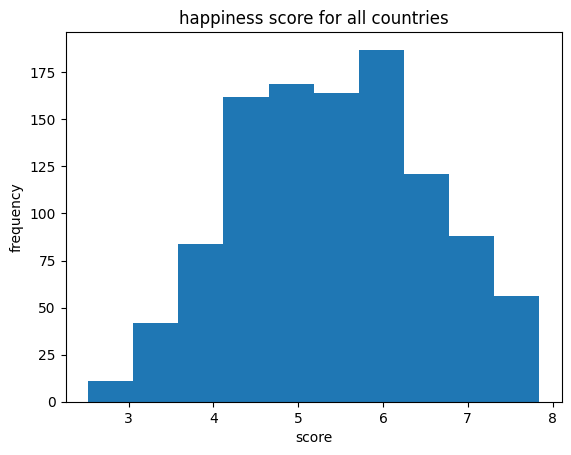

In [293]:
import matplotlib.pyplot as plt
plt.hist(df['Happiness Score'])
plt.title('happiness score for all countries')
plt.xlabel('score')
plt.ylabel('frequency')
plt.show()

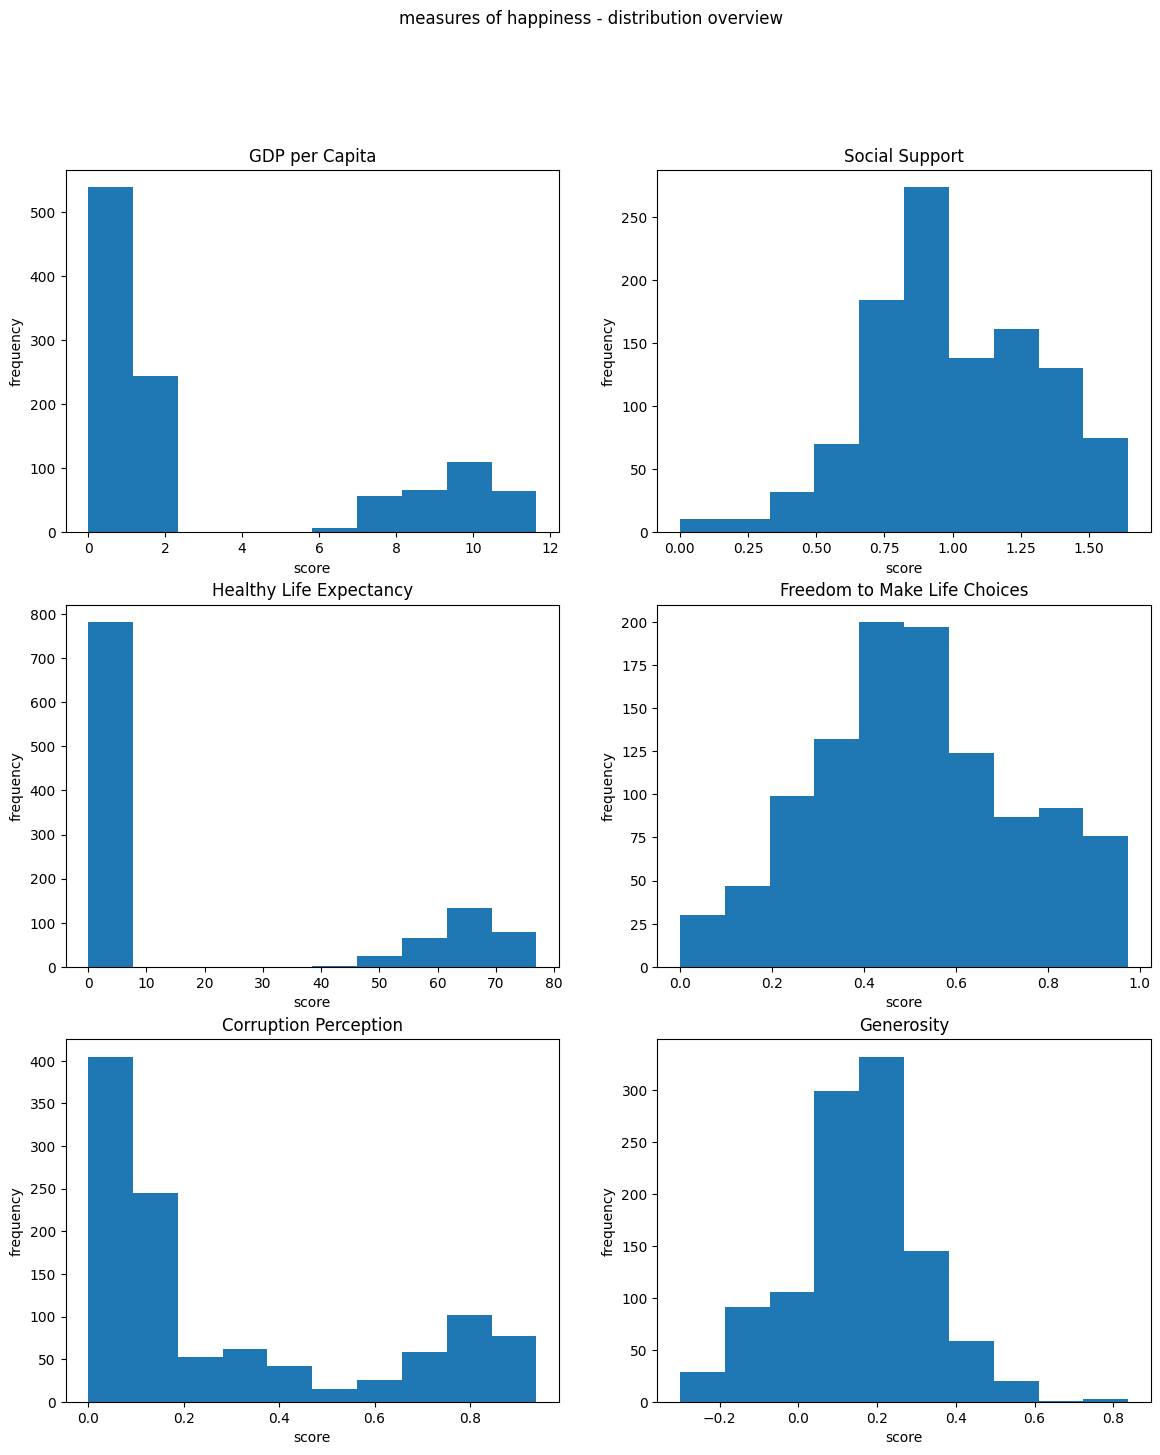

In [294]:
fig, ([ax1,ax2],[ax3,ax4],[ax5,ax6]) = plt.subplots(3,2, figsize=(14,16))
for ax, title in zip([ax1,ax2,ax3,ax4,ax5,ax6], ['GDP per Capita','Social Support','Healthy Life Expectancy','Freedom to Make Life Choices','Corruption Perception','Generosity']):
    ax.hist(df[title])
    ax.set_title(title)
    ax.set_xlabel('score')
    ax.set_ylabel('frequency')
fig.suptitle('measures of happiness - distribution overview')
plt.show()

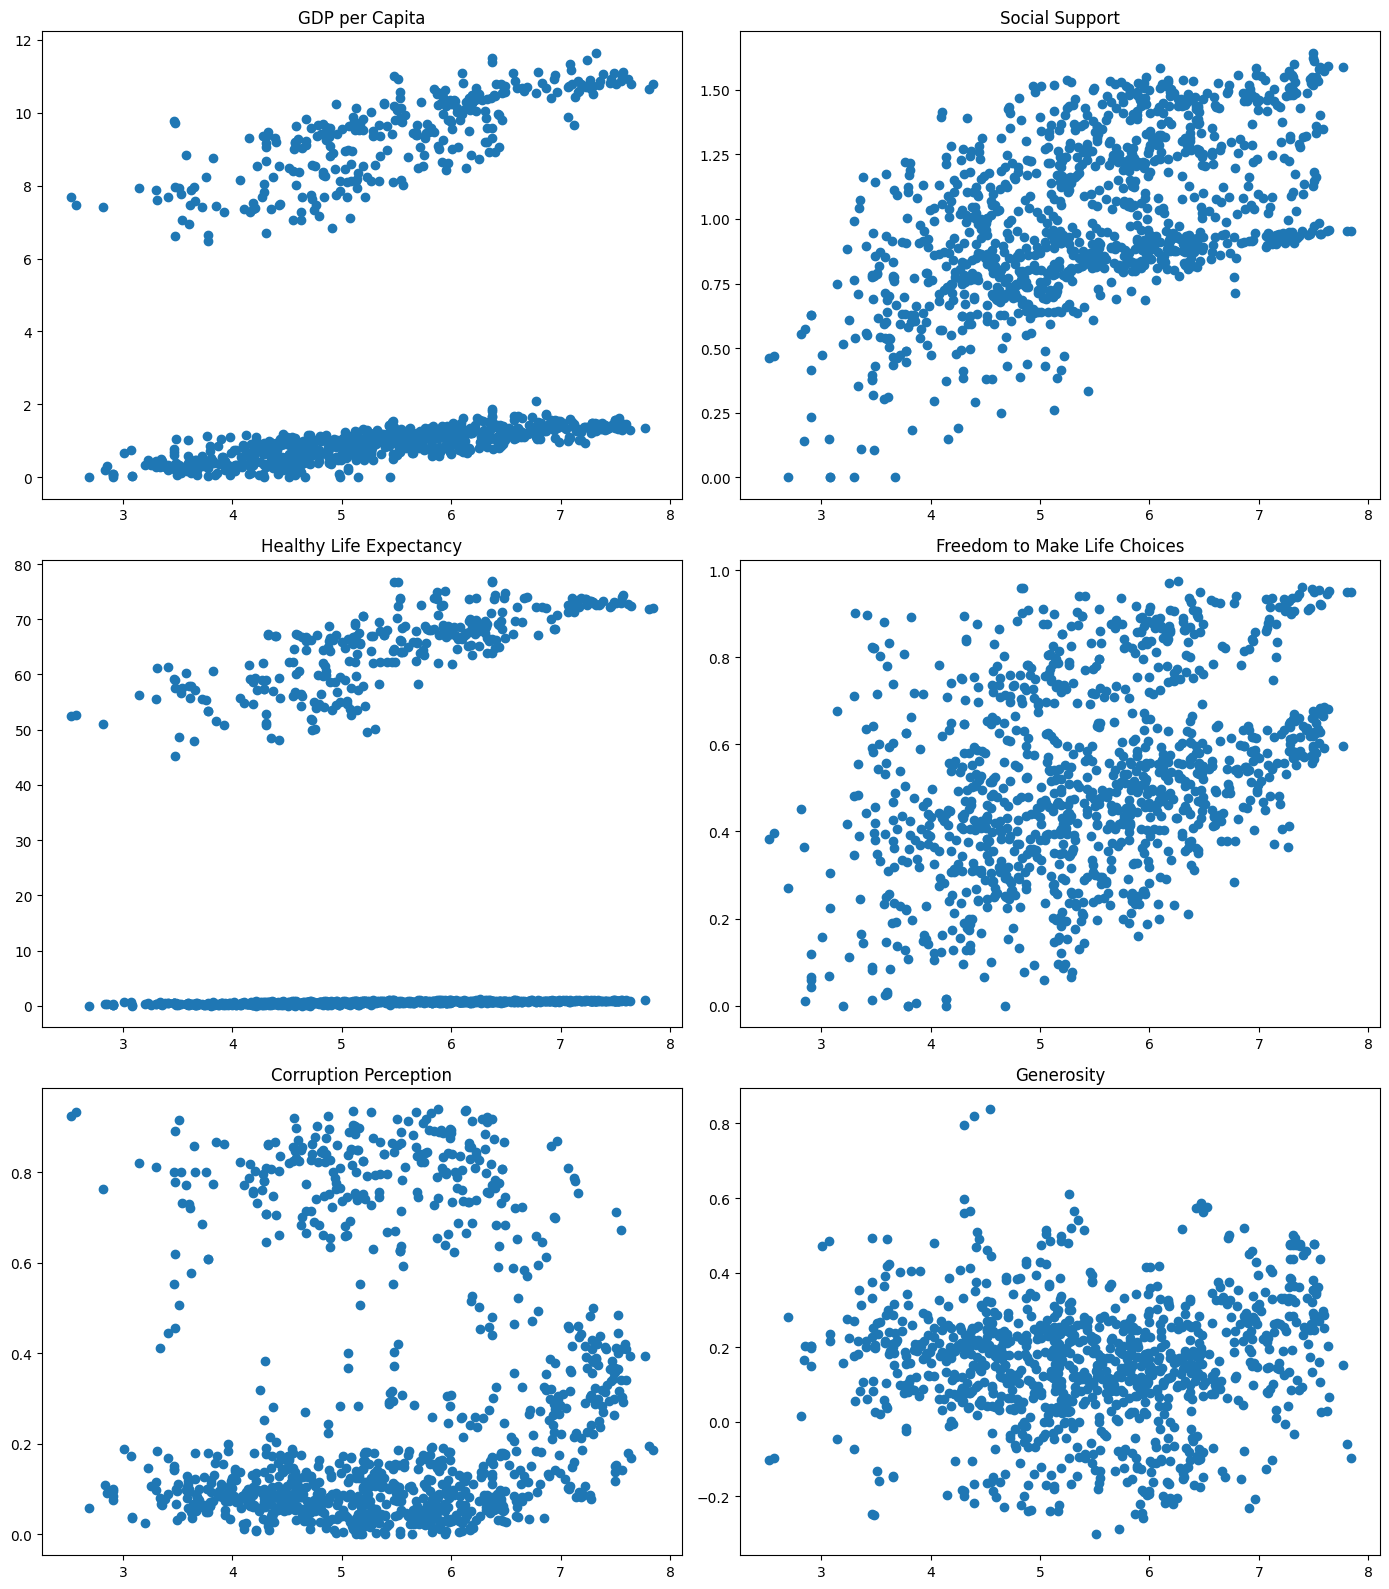

In [295]:
fig, ([ax1,ax2],[ax3,ax4],[ax5,ax6]) = plt.subplots(3,2, figsize=(14,16))
for ax, title in zip([ax1,ax2,ax3,ax4,ax5,ax6], ['GDP per Capita','Social Support','Healthy Life Expectancy','Freedom to Make Life Choices','Corruption Perception','Generosity']):
    ax.scatter(df['Happiness Score'],df[title])
    ax.set_title(title)
    #ax.set_xlabel('score')
    #ax.set_ylabel('frequency')
#fig.suptitle('measures of happiness - distribution overview')
fig.tight_layout()
plt.show()